## **Reducción de dimensionalidad / Ingeniería de Características: Transformaciones de Variables (Core)**

En esta actividad, aplicarás diversas técnicas de transformación de variables para mejorar la calidad de los datos en el dataset «House Prices – Advanced Regression Techniques» disponible en Kaggle. Aprenderás a realizar transformaciones logarítmicas, escalado y creación de variables polinómicas para mejorar el rendimiento de los modelos predictivos.

**Enlace al dataset:** https://www.kaggle.com/c/house-prices-advanced-regression-techniques



### **Objetivo:**

El objetivo es realizar transformaciones de las variables en el dataset para mejorar la distribución de los datos y su relación con la variable objetivo (el precio de las casas). Estas transformaciones son clave para mejorar la precisión de los modelos de regresión y reducir sesgos en los datos.



### **Instrucciones:**

#### **1. Carga de datos:**
- Descarga el dataset «House Prices» de Kaggle. Realiza una exploración inicial de las variables numéricas y categóricas, prestando especial atención a aquellas que están relacionadas con el tamaño de la casa, el número de habitaciones y la calidad general.
- Revisa la distribución de la variable objetivo (precio de la casa) y observa si tiene algún sesgo.

#### **2. Exploración y preprocesamiento de datos:**
- Antes de aplicar las transformaciones, realiza un análisis de las variables con distribuciones asimétricas o que contengan outliers. Estos son buenos candidatos para transformaciones logarítmicas o polinómicas.
- También identifica variables que estén en escalas diferentes para aplicar técnicas de normalización o estandarización.

#### **3. Transformaciones de variables:**
- Aplica transformaciones logarítmicas a variables sesgadas como el «SalePrice» y otras variables numéricas que tengan una distribución sesgada.
- Crea variables polinómicas a partir de las variables numéricas, como el tamaño total de la casa. Por ejemplo, agrega el cuadrado o el cubo de estas variables como nuevas características para capturar posibles relaciones no lineales.
- Estandariza las variables numéricas para que todas tengan la misma escala, lo cual es útil cuando se entrenan modelos de regresión o algoritmos basados en distancia como KNN.

#### **4. Evaluación de las transformaciones:**
- Aplica un modelo de regresión antes y después de las transformaciones para evaluar su impacto en el rendimiento del modelo.
- Compara métricas como el RMSE (Root Mean Squared Error) y el R-squared para ver si las transformaciones logarítmicas y polinómicas han mejorado la predicción del precio de las casas.

#### **5. Interpretación de los resultados:**
- Analiza cuáles de las transformaciones aplicadas tuvieron un mayor impacto en la mejora del modelo. Discute cómo las transformaciones logarítmicas ayudan a manejar el sesgo en los datos y cómo las variables polinómicas capturan relaciones más complejas.
- Reflexiona sobre la importancia de transformar variables antes de aplicar modelos de machine learning.


### **Análisis de Resultados:**

- El análisis debe centrarse en cómo las diferentes transformaciones afectaron la distribución de las variables y cómo esto influyó en la precisión del modelo predictivo. Discute las ventajas y desventajas de las transformaciones aplicadas y su relevancia en problemas de regresión.

### **Librerias y Dataset**

In [1]:
import os
import pandas as pd
import numpy as np
import utils
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import kagglehub
import kaggle
import zipfile
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [2]:
# Directorio donde se descargará el dataset
dataset_path = "datasets/house-prices"
os.makedirs(dataset_path, exist_ok=True)

# Cambiar al directorio del proyecto
os.chdir(dataset_path)

# Descargar el dataset desde Kaggle (requiere que configures el API de Kaggle previamente)
!kaggle competitions download -c house-prices-advanced-regression-techniques

# Extraer el archivo ZIP
zip_file_path = "house-prices-advanced-regression-techniques.zip"
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(".")  # Extraer al directorio actual

# Cargar los archivos CSV
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)


### **Exploratory Data Analysis**

In [3]:

# Mostrar las primeras filas del dataset de entrenamiento
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


Eliminamos la columna Id porque no aporta nada

In [6]:
# Eliminar la columna Id
train = train.drop('Id', axis=1)

#### **Analisis de duplicados**

In [7]:
duplicados = train.duplicated() # Identificar duplicados
num_duplicados = duplicados.sum() # Contar el número de duplicados
print(f"Número de registros duplicados en el dataset: {num_duplicados}")

Número de registros duplicados en el dataset: 0


#### **Analisis de las distribuciones**

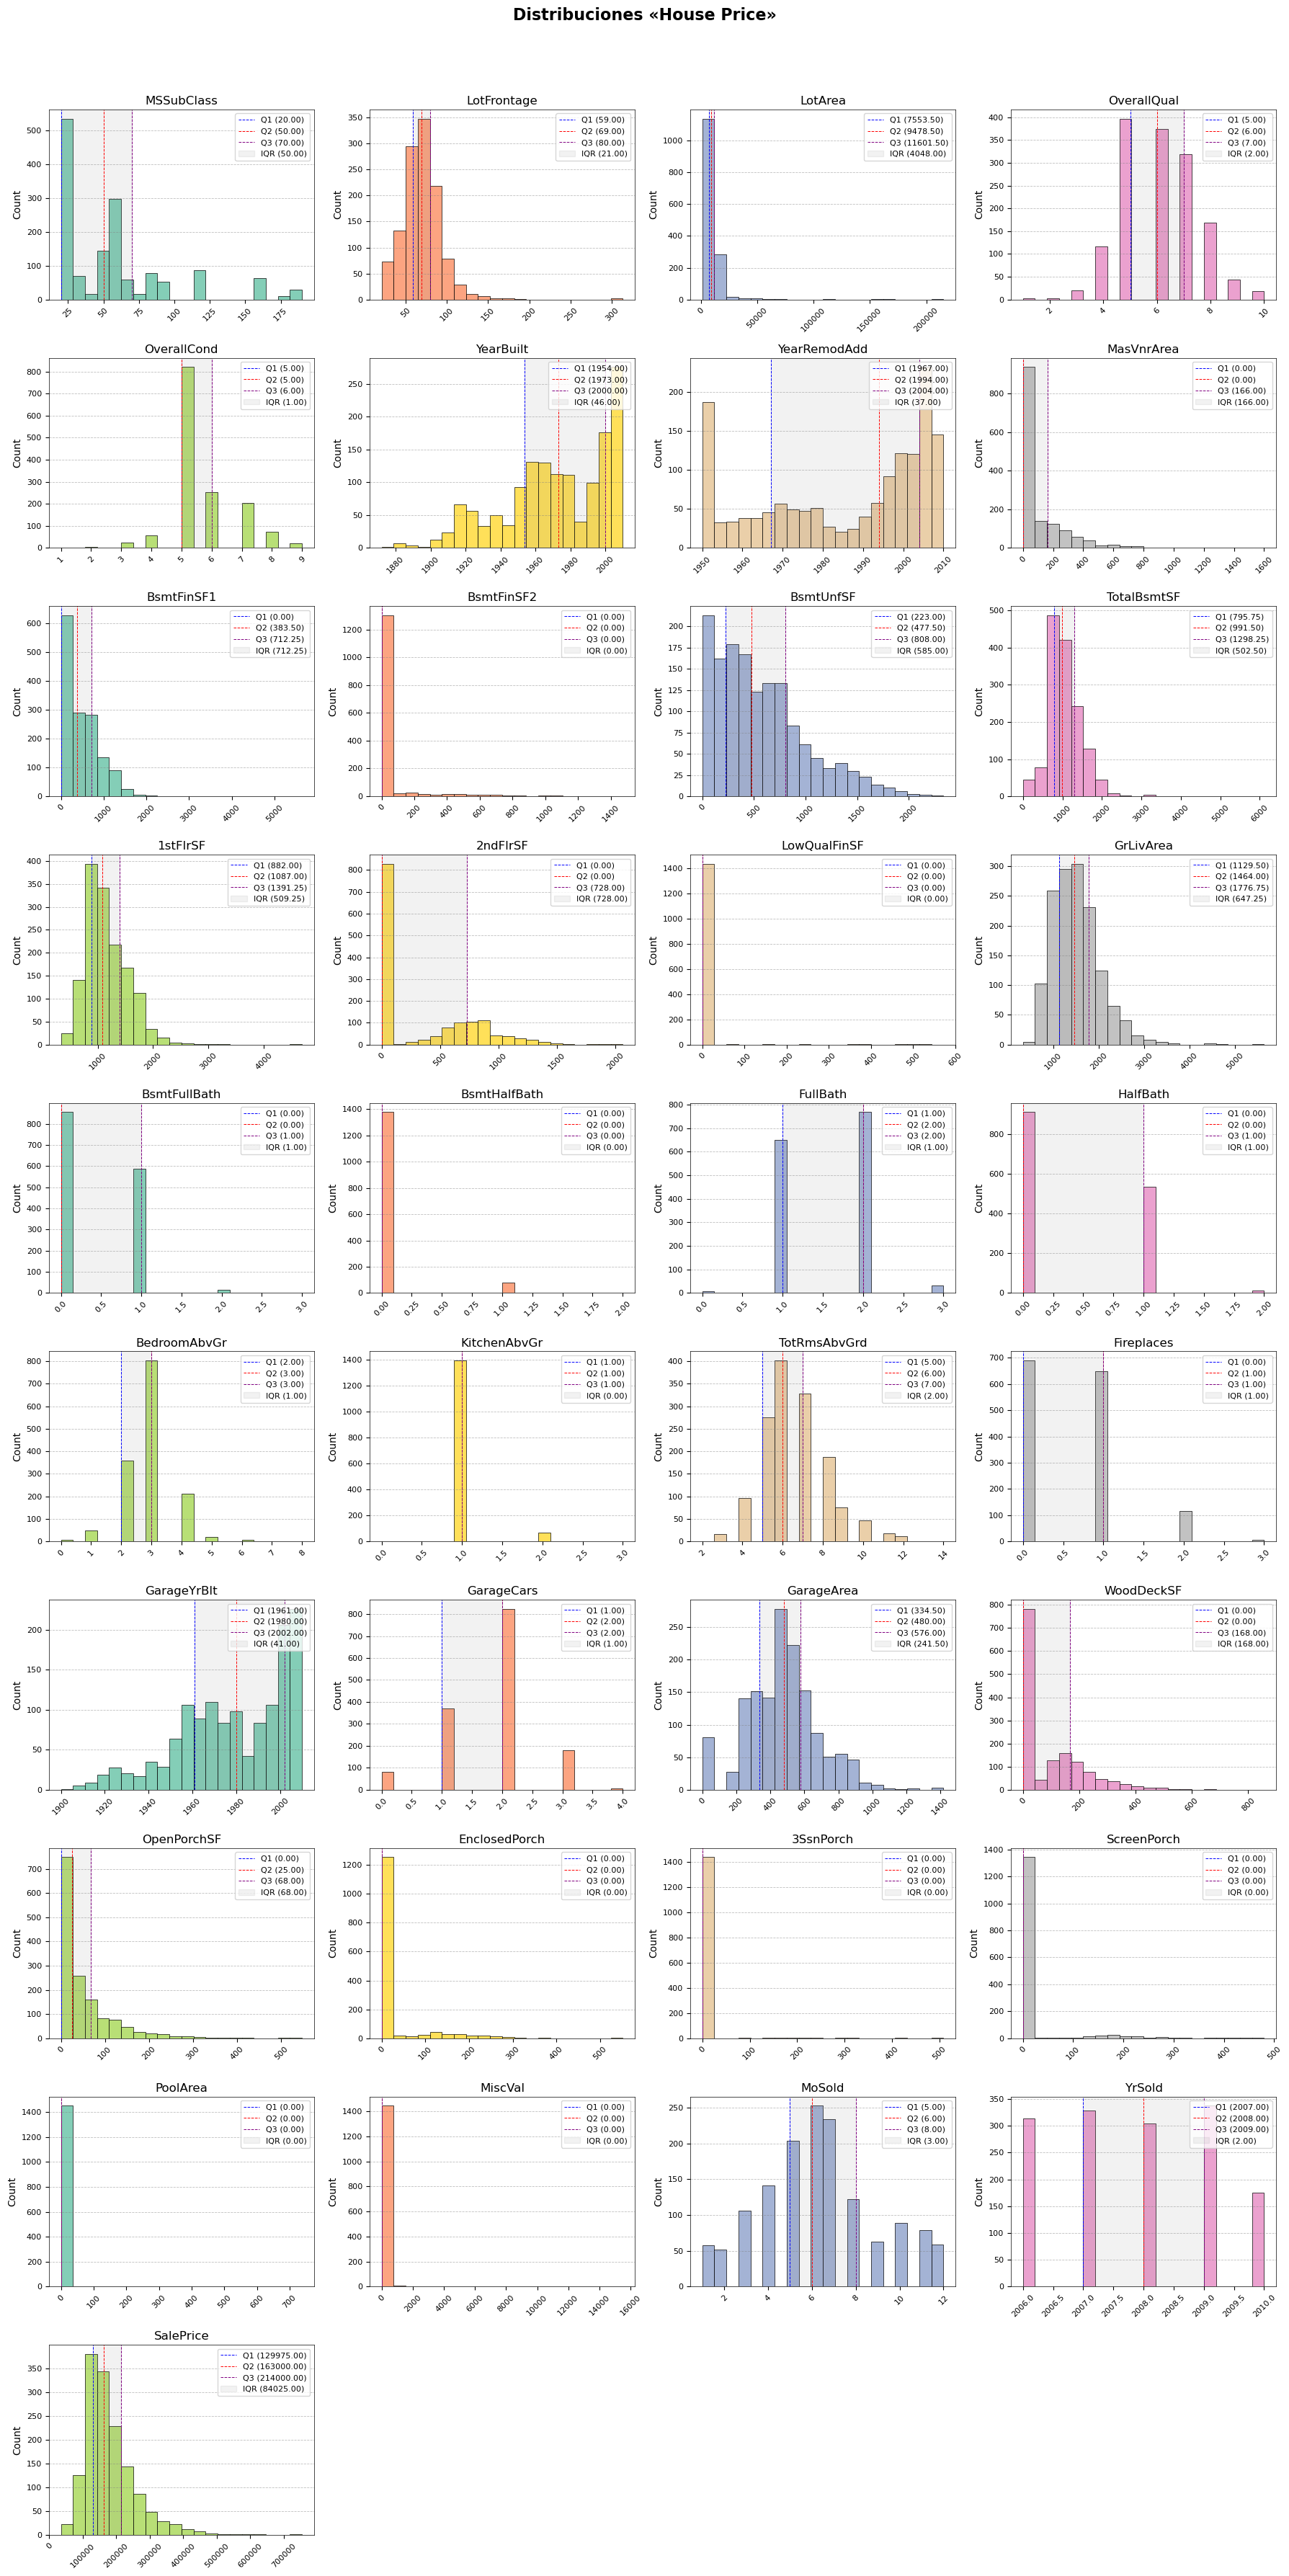

In [8]:
distributionplot = utils.plot_distributions2(
    train,  # DataFrame con los datos a graficar
    figsize=(18, 35),  # Tamaño de la figura (ancho x alto)
    nrows=10,  # Número de filas en la cuadrícula de subplots
    ncols=4,  # Número de columnas en la cuadrícula de subplots
    bins=20,  # Método de cálculo de bins ('rice', 'sqrt', 'sturges', etc.)
    color_palette='Set2',  # Paleta de colores de Seaborn
    show_iqr_and_legend=True,  # Desactivar tanto los rangos IQR como la leyenda
    kde=False,
    title='Distribuciones «House Price»'  # Título de la figura
)


#### **Analisis de valores nulos**

In [9]:
utils.calculate_na_statistics(train).head(20)

,datos sin NAs en q,Na en q,Na en %
PoolQC,7,1453,99.52
MiscFeature,54,1406,96.30
Alley,91,1369,93.77
Fence,281,1179,80.75
MasVnrType,588,872,59.73
FireplaceQu,770,690,47.26
LotFrontage,1201,259,17.74
GarageYrBlt,1379,81,5.55
GarageCond,1379,81,5.55
GarageType,1379,81,5.55


#### **Analisis de Outliers**

Seleccionamos las variables numericas para calcular los outliers

In [10]:
data_numeric = train.select_dtypes(include=['int64', 'float64'])

Graficos de Outliers

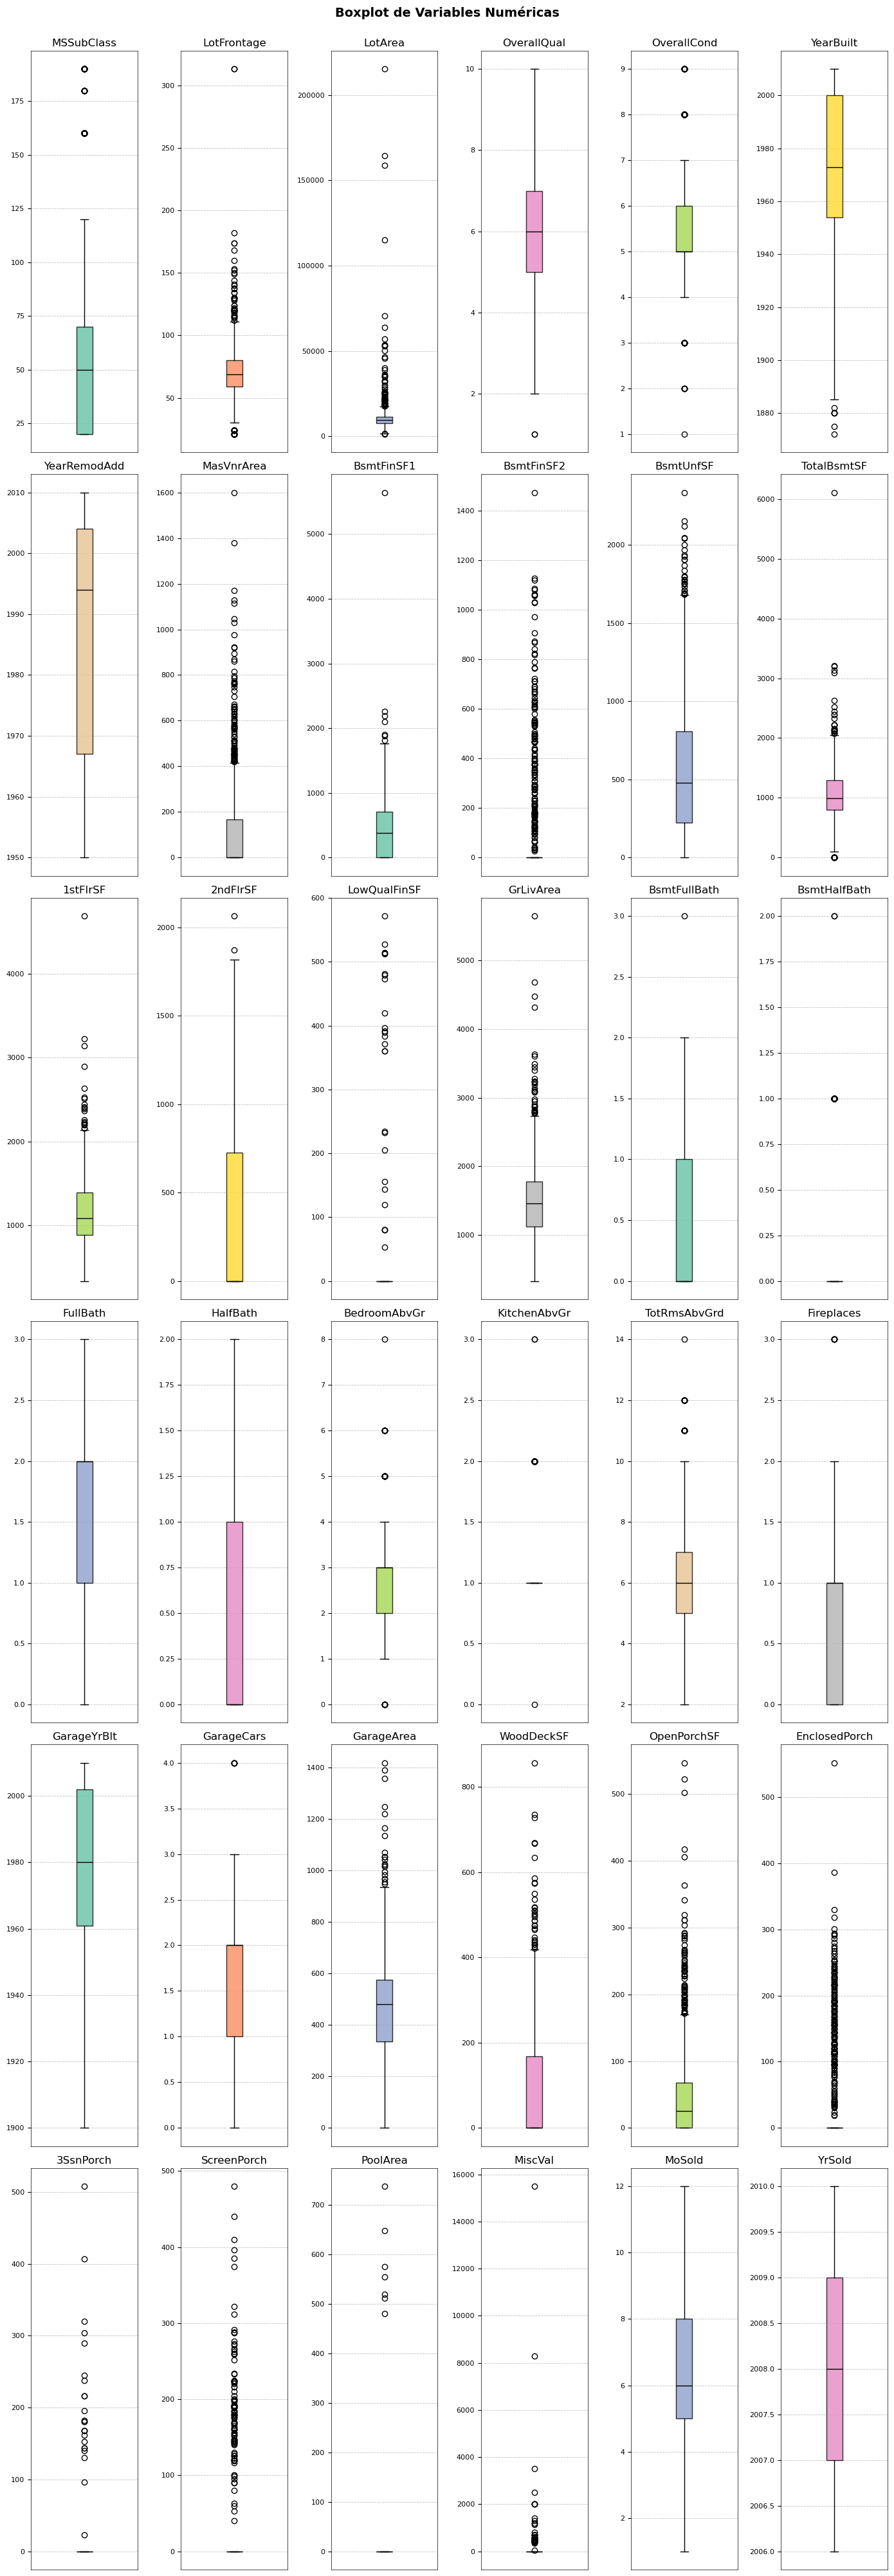

In [11]:
# Con personalización total
boxplots = utils.plot_boxplots(data_numeric, 
                    nrows=6,  # Forzar 1 fila 
                    ncols=6,  # Forzar 6 columnas
                    figsize=(14,40),  # Tamaño personalizado
                    color_palette='Set2',  # Paleta diferente
                    grid=True,  # Mostrar cuadrícula
                    title='Boxplot de Variables Numéricas',  # Título personalizado
                    median_color='black',  # Color de línea de mediana
                    box_alpha=0.8)  # Transparencia personalizada
plt.show()


Estadisticos de Outliers

In [12]:
# Create a summary DataFrame for outliers
outliers_summary = pd.DataFrame()
for column in data_numeric:
    outliers = utils.detect_outliers_iqr(data_numeric[column])
    outliers_summary[column] = {
        'Number of Outliers': outliers.sum(),
        'Percentage of Outliers': 100 * outliers.mean(),
        'Lower Bound': data_numeric[column][~outliers].min(),
        'Upper Bound': data_numeric[column][~outliers].max()
    }

outliers_summary.T

,Number of Outliers,Percentage of Outliers,Lower Bound,Upper Bound
MSSubClass,103.0,7.054795,20.0,120.0
LotFrontage,88.0,6.027397,30.0,111.0
LotArea,69.0,4.726027,1491.0,17671.0
OverallQual,2.0,0.136986,2.0,10.0
OverallCond,125.0,8.561644,4.0,7.0
YearBuilt,7.0,0.479452,1885.0,2010.0
YearRemodAdd,0.0,0.000000,1950.0,2010.0
MasVnrArea,96.0,6.575342,0.0,415.0
BsmtFinSF1,7.0,0.479452,0.0,1767.0
BsmtFinSF2,167.0,11.438356,0.0,0.0


#### **Consistencia en Valores**

In [13]:
import pandas as pd

def convertir_columnas_booleanas(df):
    """
    Convierte columnas con dos valores únicos en columnas booleanas en el DataFrame.
    
    Args:
        df (pd.DataFrame): El DataFrame a procesar.

    Returns:
        pd.DataFrame: El DataFrame con las columnas convertidas.
        list: Lista de las columnas que fueron convertidas.
    """
    # Lista de posibles pares de valores booleanos
    valores_columnas_booleanas_potenciales = [
        [0, 1],
        [0.0, 1.0],
        ["false", "true"],
        ["no", "yes"],
        ["no", "si"],
        ["N", "Y"],
    ]

    def _convertir_valor_a_booleano(x):
        """Convierte un valor a booleano si es posible."""
        if x in [0, 0.0, "false", "no", "N"]:
            return False
        if x in [1, 1.0, "true", "yes", "si", "Y"]:
            return True
        return x

    # Lista para rastrear columnas convertidas
    columnas_convertidas_booleanas = []

    for columna in df.columns:
        valores_unicos = df[columna].dropna().unique()

        # Si la columna tiene solo 2 valores únicos, intenta convertirla a booleana
        if len(valores_unicos) == 2:
            for posibilidad in valores_columnas_booleanas_potenciales:
                if set(valores_unicos) == set(posibilidad):
                    print(f"La columna '{columna}' es booleana. Será convertida.")
                    df[columna] = df[columna].apply(_convertir_valor_a_booleano)
                    df[columna] = df[columna].astype("bool")
                    columnas_convertidas_booleanas.append(columna)
                    break

    return df, columnas_convertidas_booleanas


# Ejemplo de uso
# Carga de datos
# df = pd.read_csv("ruta_al_archivo.csv")  # Reemplaza con tu DataFrame

# Aplicar la función
df, columnas_convertidas = convertir_columnas_booleanas(train)

# Imprimir las columnas convertidas
print(f"Columnas convertidas a booleanas: {columnas_convertidas}")


La columna 'CentralAir' es booleana. Será convertida.
Columnas convertidas a booleanas: ['CentralAir']


In [14]:
# Porcentaje para considerar una columna como categórica
porcentaje_max_columnas_categoricas = 0.05
cant_filas_df = df.shape[0]

# Listas para almacenar resultados
columnas_a_excluir = []
columnas_convertidas_a_categoricas = []
columnas_convertidas_a_string = []

# Obtener columnas de tipo objeto o cadena
columnas_objeto_cadena = train.select_dtypes(include=['object', 'string']).columns.tolist()

for columna in columnas_objeto_cadena:
    valores_unicos = train[columna].dropna().unique().tolist()
    cantidad_unicos = len(valores_unicos)
    umbral = porcentaje_max_columnas_categoricas * cant_filas_df

    print(f"Columna '{columna}': {cantidad_unicos} valores únicos (Umbral: {umbral:.2f})")
    
    if cantidad_unicos <= umbral:
        # Convertir la columna a categórica
        print(f"-> Columna '{columna}' convertida a categórica.")
        df[columna] = df[columna].astype("category")
        columnas_convertidas_a_categoricas.append(columna)
    else:
        # Dejar la columna como string
        print(f"-> Columna '{columna}' se deja como string.")
        df[columna] = df[columna].astype("string")
        columnas_convertidas_a_string.append(columna)

    # Liberar memoria de la lista de valores únicos
    del valores_unicos

# Resultados finales
print("\nResumen:")
print(f"Total columnas analizadas: {len(columnas_objeto_cadena)}")
print(f"Columnas convertidas a categóricas: {len(columnas_convertidas_a_categoricas)}")
print(f"Columnas convertidas a string: {len(columnas_convertidas_a_string)}")
print(f"\nDetalle de columnas categóricas: {columnas_convertidas_a_categoricas}")
print(f"Detalle de columnas string: {columnas_convertidas_a_string}")


Columna 'MSZoning': 5 valores únicos (Umbral: 73.00)
-> Columna 'MSZoning' convertida a categórica.
Columna 'Street': 2 valores únicos (Umbral: 73.00)
-> Columna 'Street' convertida a categórica.
Columna 'Alley': 2 valores únicos (Umbral: 73.00)
-> Columna 'Alley' convertida a categórica.
Columna 'LotShape': 4 valores únicos (Umbral: 73.00)
-> Columna 'LotShape' convertida a categórica.
Columna 'LandContour': 4 valores únicos (Umbral: 73.00)
-> Columna 'LandContour' convertida a categórica.
Columna 'Utilities': 2 valores únicos (Umbral: 73.00)
-> Columna 'Utilities' convertida a categórica.
Columna 'LotConfig': 5 valores únicos (Umbral: 73.00)
-> Columna 'LotConfig' convertida a categórica.
Columna 'LandSlope': 3 valores únicos (Umbral: 73.00)
-> Columna 'LandSlope' convertida a categórica.
Columna 'Neighborhood': 25 valores únicos (Umbral: 73.00)
-> Columna 'Neighborhood' convertida a categórica.
Columna 'Condition1': 9 valores únicos (Umbral: 73.00)
-> Columna 'Condition1' convertida

#### **Estadisticas Descriptivas**

#### **Correlaciones**

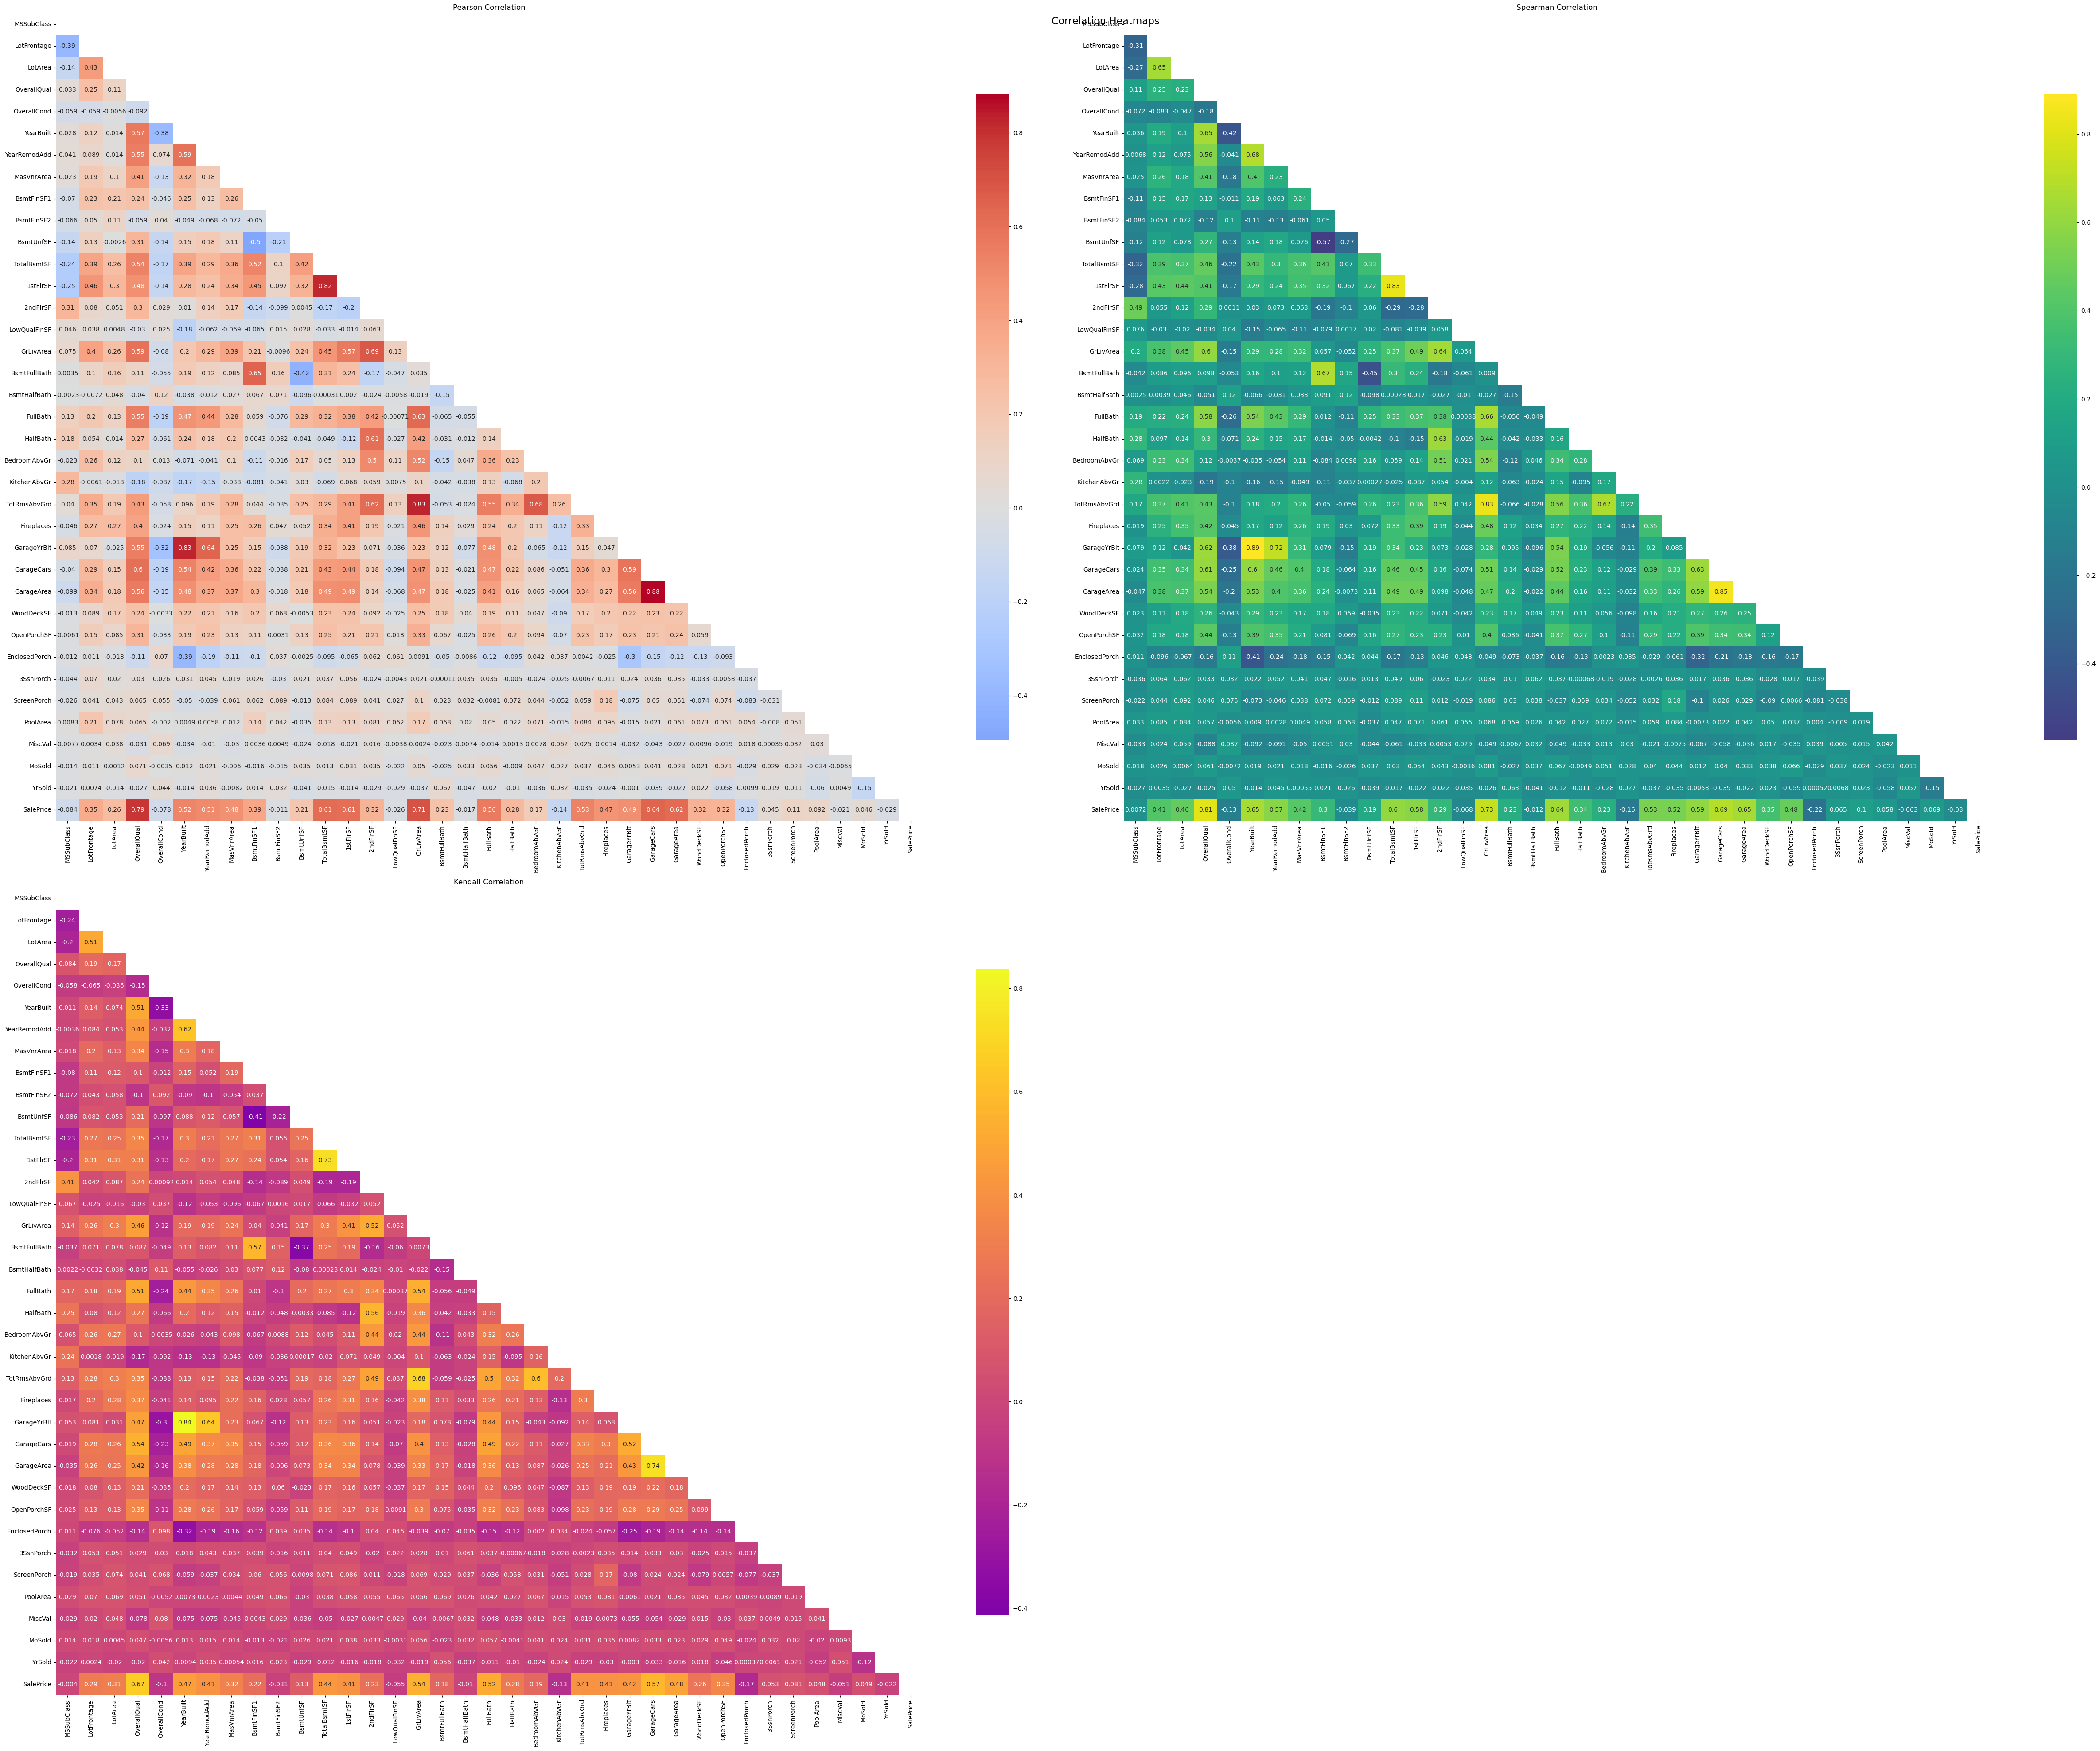

In [15]:
pearson_corr = data_numeric.corr(method='pearson')
spearman_corr = data_numeric.corr(method='spearman')
kendall_corr = data_numeric.corr(method='kendall')

utils.graph_correlations(
    pearson_corr, 
    spearman_corr, 
    kendall_corr, 
    title="Correlation Heatmaps", 
    figsize=(50, 40),
    annot_size=10
)

Top Feactures correlacionadas con SalePrice

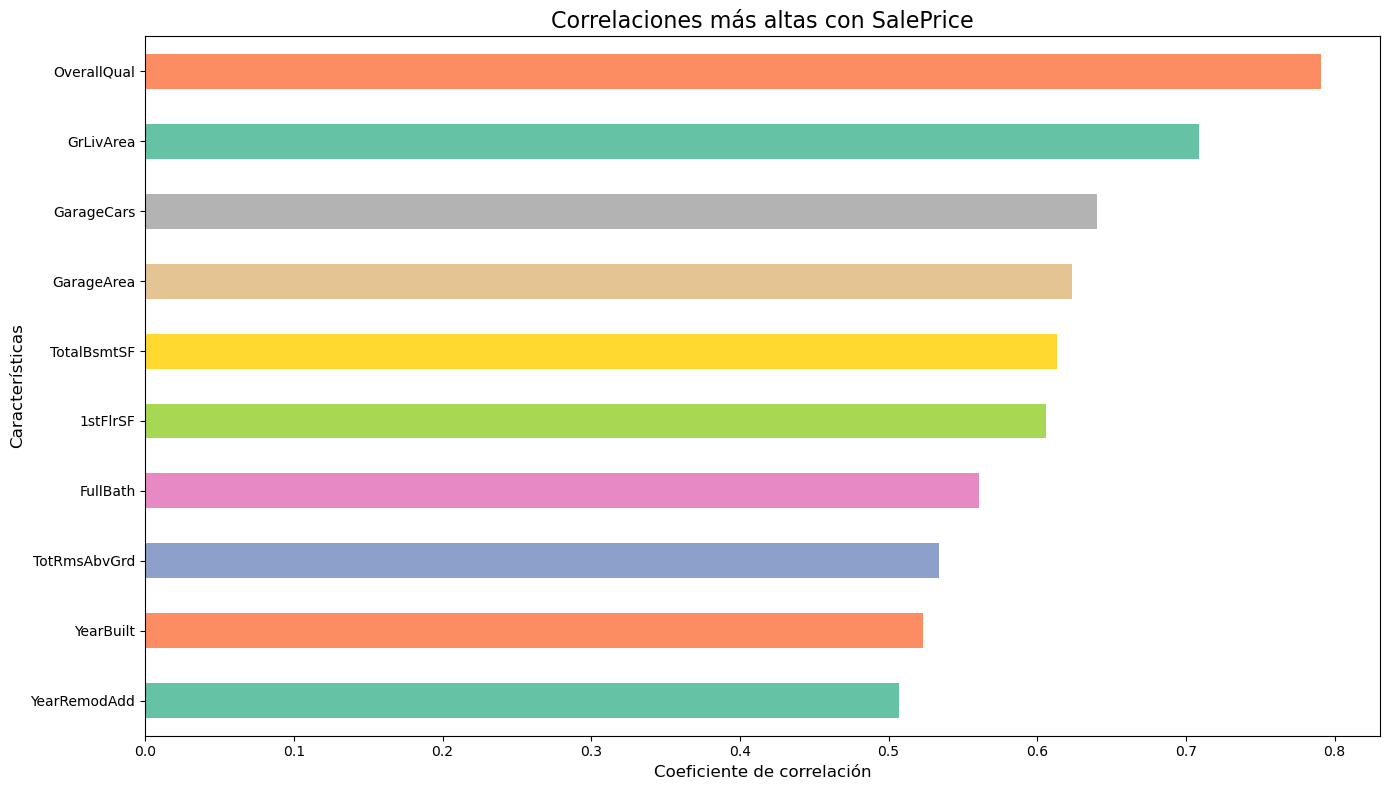

In [16]:
# Llamar la función con tus datos y personalizaciones
utils.plot_top_correlations(
    data=data_numeric, 
    target_column="SalePrice", 
    top_n=10, 
    palette="Set2", 
    figsize=(14, 8), 
    title="Correlaciones más altas con SalePrice", 
    xlabel="Coeficiente de correlación", 
    ylabel="Características", 
    grid=False, 
    grid_style={'linestyle': '--', 'linewidth': 0.6, 'color': 'black', 'alpha': 0.5}
)
